In [217]:
# Built-in dependencies
import copy

# External dependencies
import numpy as np
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
from statsmodels.regression.rolling import RollingOLS


# Constants
TICKER: str = "TLT"

In [2]:
data: pd.DataFrame = yf.download(tickers=TICKER, period="max")
data

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TLT,TLT,TLT,TLT,TLT,TLT
Date,,,,,,
2002-07-30 00:00:00+00:00,38.428143,81.519997,81.900002,81.519997,81.750000,6100
2002-07-31 00:00:00+00:00,38.904232,82.529999,82.800003,81.900002,81.949997,29400
2002-08-01 00:00:00+00:00,39.125847,83.000000,83.019997,82.540001,82.540001,25000
2002-08-02 00:00:00+00:00,39.526505,83.849998,84.099998,82.879997,83.160004,52800
2002-08-05 00:00:00+00:00,39.700928,84.220001,84.440002,83.849998,84.040001,61100
...,...,...,...,...,...,...
2024-12-09 00:00:00+00:00,93.519997,93.519997,94.040001,93.470001,93.989998,30509600
2024-12-10 00:00:00+00:00,93.080002,93.080002,93.300003,92.910004,93.019997,28706500


In [3]:
data["day_of_month"] = [date.day for date in data.index.date]
data

Price,Adj Close,Close,High,Low,Open,Volume,day_of_month
Ticker,TLT,TLT,TLT,TLT,TLT,TLT,
Date,,,,,,,
2002-07-30 00:00:00+00:00,38.428143,81.519997,81.900002,81.519997,81.750000,6100,30
2002-07-31 00:00:00+00:00,38.904232,82.529999,82.800003,81.900002,81.949997,29400,31
2002-08-01 00:00:00+00:00,39.125847,83.000000,83.019997,82.540001,82.540001,25000,1
2002-08-02 00:00:00+00:00,39.526505,83.849998,84.099998,82.879997,83.160004,52800,2
2002-08-05 00:00:00+00:00,39.700928,84.220001,84.440002,83.849998,84.040001,61100,5
...,...,...,...,...,...,...,...
2024-12-09 00:00:00+00:00,93.519997,93.519997,94.040001,93.470001,93.989998,30509600,9
2024-12-10 00:00:00+00:00,93.080002,93.080002,93.300003,92.910004,93.019997,28706500,10


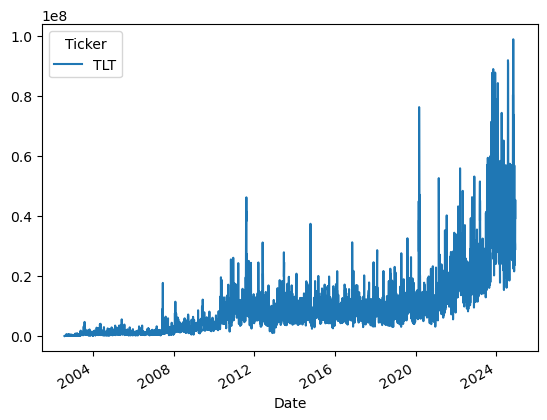

In [ ]:
data["Volume"].plot(legend=True)
plt.show(title="Volume")

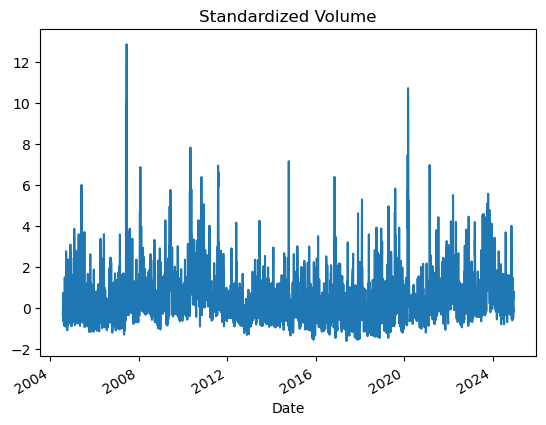

In [218]:
data["standardized_volume"] = ((data["Volume"] - data["Volume"].ewm(halflife=252, min_periods=504).mean()) / data["Volume"].ewm(halflife=252, min_periods=504).std()).dropna()[TICKER]
data["standardized_volume"].plot(title="Standardized Volume")
plt.show()

In [232]:
def plot_by_time_of_month(data: pd.DataFrame, statistic: str, title: str, groupby: str = "day_of_month", kind: str = "line") -> None:

    pd.DataFrame(
        {
            "50%": data.groupby(groupby)[statistic].median(),
            "90%": data.groupby(groupby)[statistic].quantile(q=0.90),
            "10%": data.groupby(groupby)[statistic].quantile(q=0.10),
        }
    ).plot(kind=kind, title=title, legend=True)

    plt.show()

    return

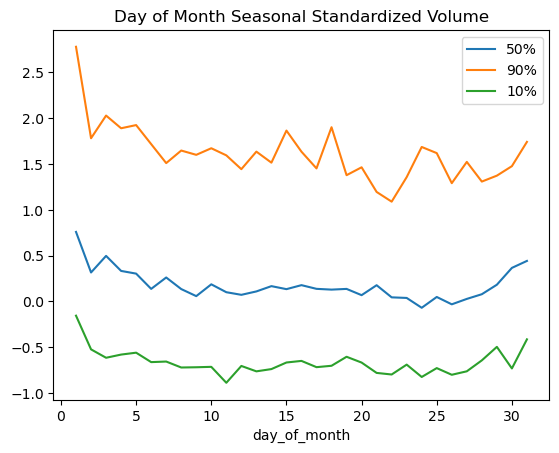

In [233]:
plot_by_time_of_month(data=data, statistic="standardized_volume", title="Day of Month Seasonal Standardized Volume")

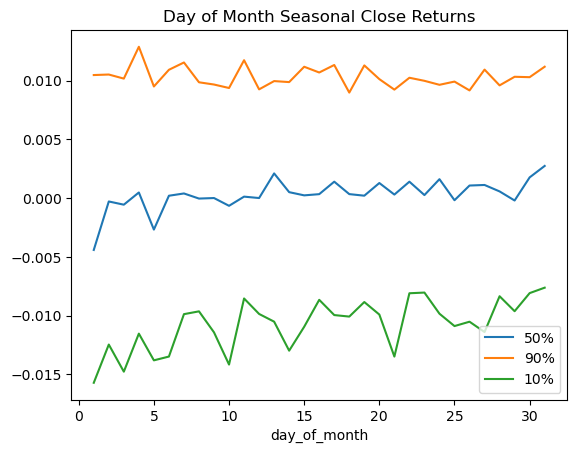

In [234]:
data["close_returns"] = data["Close"].pct_change()[TICKER]

plot_by_time_of_month(data=data, statistic="close_returns", title="Day of Month Seasonal Close Returns")

In [226]:
def time_series_z_score(data: pd.DataFrame, statistic: str, halflife: int) -> pd.Series:
    return (
        (data[statistic] - data[statistic].ewm(halflife=halflife, min_periods=2*halflife).mean())
        / data[statistic].ewm(halflife=halflife, min_periods=2*halflife).std()
    ).dropna()

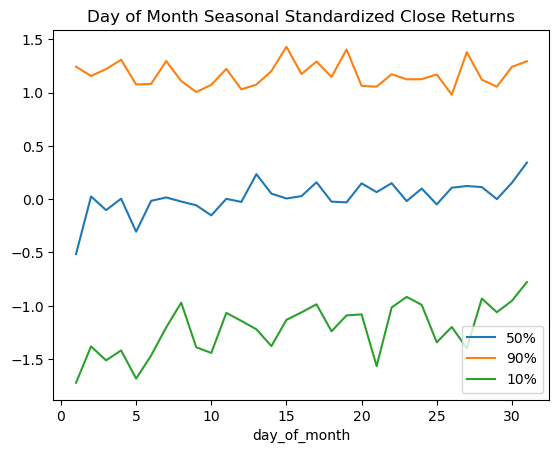

In [235]:
data["standardized_close_returns"] = time_series_z_score(data=data, statistic="close_returns", halflife=252)

plot_by_time_of_month(data=data, statistic="standardized_close_returns", title="Day of Month Seasonal Standardized Close Returns")

In [258]:
def get_week_of_month(date: pd.Timestamp) -> int:
    """
    Calculates the numerical (not calendar) week of the month.
    """
    return int(np.ceil(date.day / 7))


data["week_of_month"] = [get_week_of_month(date=date) for date in data.index]
data["week_of_month"]

Date
2002-07-30 00:00:00+00:00    5
2002-07-31 00:00:00+00:00    5
2002-08-01 00:00:00+00:00    1
2002-08-02 00:00:00+00:00    1
2002-08-05 00:00:00+00:00    1
                            ..
2024-12-09 00:00:00+00:00    2
2024-12-10 00:00:00+00:00    2
2024-12-11 00:00:00+00:00    2
2024-12-12 00:00:00+00:00    2
2024-12-13 00:00:00+00:00    2
Name: week_of_month, Length: 5634, dtype: int64

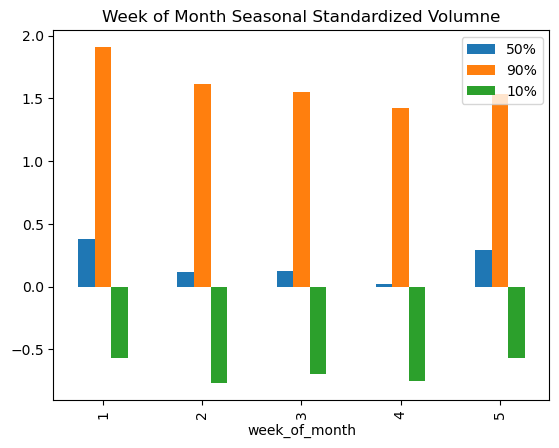

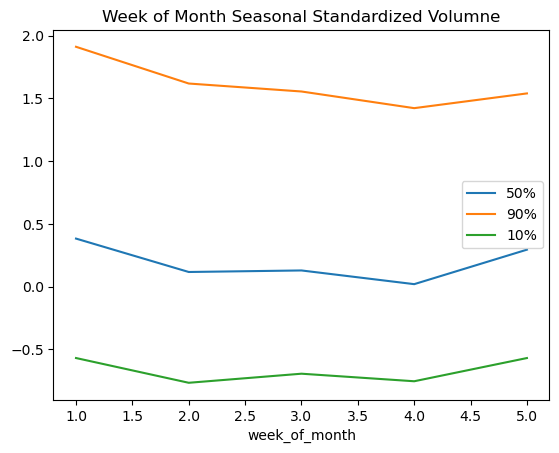

In [237]:
plot_by_time_of_month(data=data, statistic="standardized_volume", title="Week of Month Seasonal Standardized Volumne", groupby="week_of_month", kind="bar")
plot_by_time_of_month(data=data, statistic="standardized_volume", title="Week of Month Seasonal Standardized Volumne", groupby="week_of_month", kind="line")

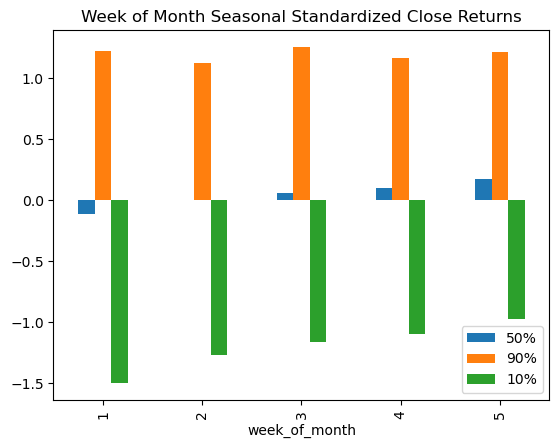

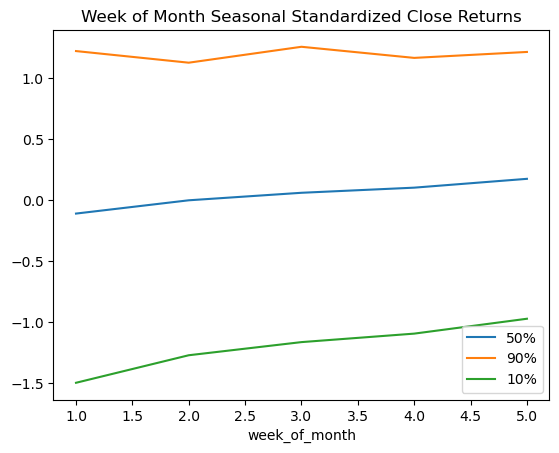

In [238]:
plot_by_time_of_month(data=data, statistic="standardized_close_returns", title="Week of Month Seasonal Standardized Close Returns", groupby="week_of_month", kind="bar")
plot_by_time_of_month(data=data, statistic="standardized_close_returns", title="Week of Month Seasonal Standardized Close Returns", groupby="week_of_month", kind="line")

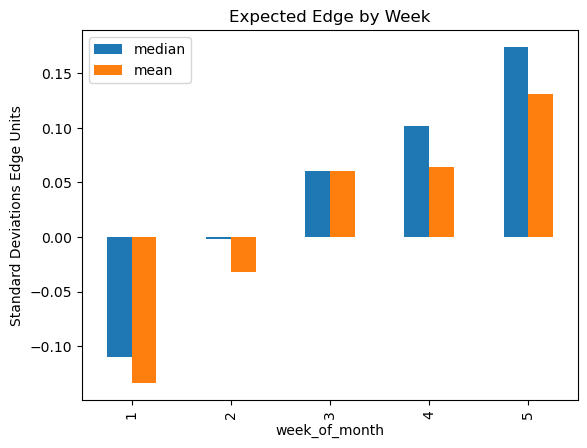

In [240]:
pd.DataFrame(
    {
        "median": data.groupby("week_of_month")["standardized_close_returns"].median(),
        "mean": data.groupby("week_of_month")["standardized_close_returns"].mean()
    }
).plot(kind="bar")


plt.title("Expected Edge by Week")
plt.ylabel("Standard Deviations Edge Units")
plt.legend()
plt.show()

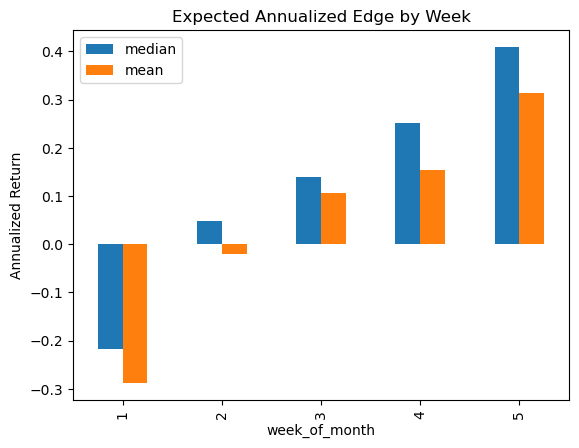

In [239]:
pd.DataFrame(
    {
        "median": data.groupby("week_of_month")["close_returns"].median() * 252,
        "mean": data.groupby("week_of_month")["close_returns"].mean() * 252
    }
).plot(kind="bar")


plt.title("Expected Annualized Edge by Week")
plt.ylabel("Annualized Return")
plt.legend()
plt.show()

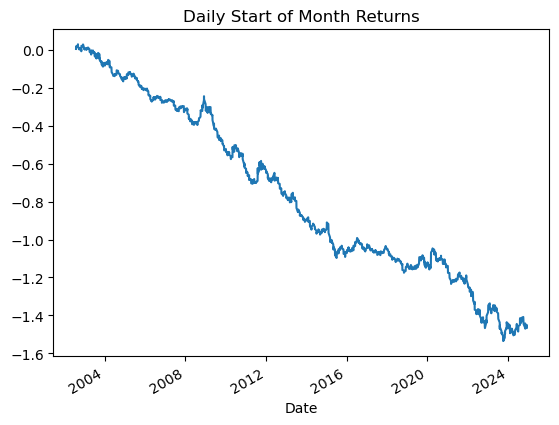

C:\Users\marcu\AppData\Local\Temp\ipykernel_22512\3728945043.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  start_of_month_monthly_close_returns.index = start_of_month_monthly_close_returns.index.to_period('M')


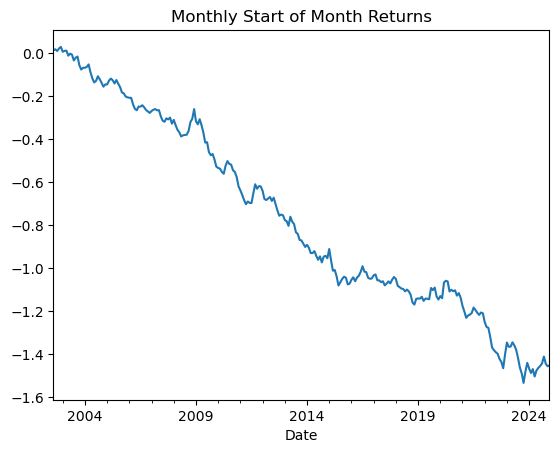

Date
2002-08    0.014195
2002-09    0.004499
2002-10   -0.008062
2002-11    0.011828
2002-12    0.007247
             ...   
2024-08    0.012318
2024-09    0.031504
2024-10   -0.033708
2024-11   -0.011442
2024-12    0.004558
Freq: M, Name: close_returns, Length: 269, dtype: float64

In [241]:
start_of_month_daily_close_returns = data[data["week_of_month"] == 1]["close_returns"]
start_of_month_daily_close_returns.cumsum().plot(title="Daily Start of Month Returns")
plt.show()

start_of_month_monthly_close_returns = copy.deepcopy(start_of_month_daily_close_returns)
start_of_month_monthly_close_returns.index = start_of_month_monthly_close_returns.index.to_period('M')
start_of_month_monthly_close_returns = start_of_month_monthly_close_returns.groupby(start_of_month_monthly_close_returns.index).sum()
start_of_month_monthly_close_returns.cumsum().plot(title="Monthly Start of Month Returns")
plt.show()

start_of_month_monthly_close_returns

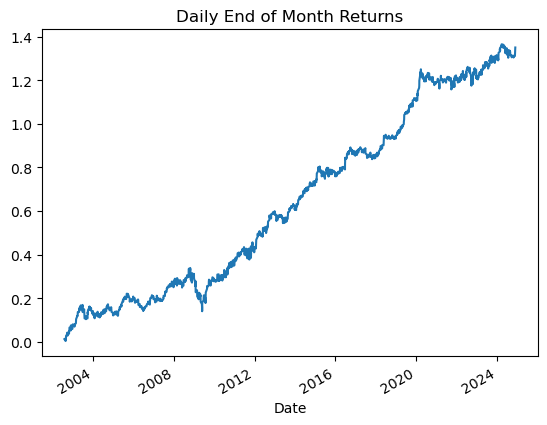

C:\Users\marcu\AppData\Local\Temp\ipykernel_22512\3599559072.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  end_of_month_monthly_close_returns.index = end_of_month_monthly_close_returns.index.to_period('M')


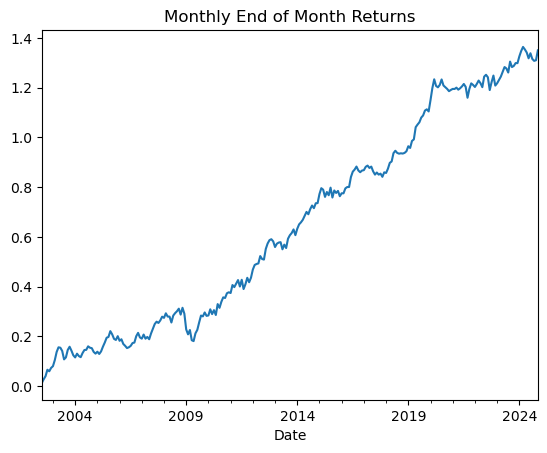

Date
2002-07    0.012390
2002-08    0.014862
2002-09    0.012416
2002-10    0.025719
2002-11   -0.006281
             ...   
2024-07    0.020337
2024-08   -0.022810
2024-09   -0.007855
2024-10    0.002433
2024-11    0.039809
Freq: M, Name: close_returns, Length: 269, dtype: float64

In [242]:
end_of_month_daily_close_returns = data[data["week_of_month"] >= 4]["close_returns"]
end_of_month_daily_close_returns.cumsum().plot(title="Daily End of Month Returns")
plt.show()

end_of_month_monthly_close_returns = copy.deepcopy(end_of_month_daily_close_returns)
end_of_month_monthly_close_returns.index = end_of_month_monthly_close_returns.index.to_period('M')
end_of_month_monthly_close_returns = end_of_month_monthly_close_returns.groupby(end_of_month_monthly_close_returns.index).sum()
end_of_month_monthly_close_returns.cumsum().plot(title="Monthly End of Month Returns")
plt.show()

end_of_month_monthly_close_returns

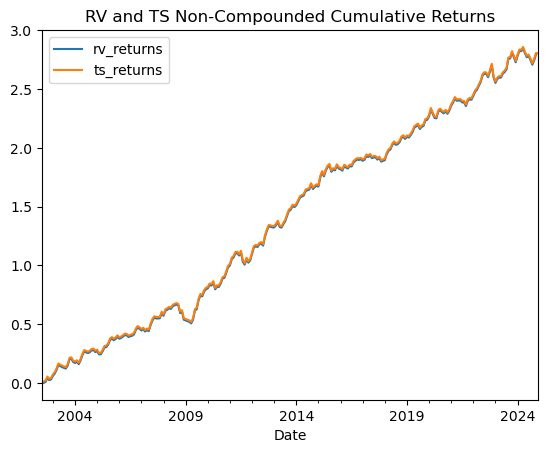

In [243]:
rv_returns = (end_of_month_monthly_close_returns - start_of_month_monthly_close_returns)
ts_returns = pd.concat([end_of_month_monthly_close_returns, -start_of_month_monthly_close_returns], axis=1).sum(axis=1)

pd.DataFrame(
    {
        "rv_returns": rv_returns.cumsum(),
        "ts_returns": ts_returns.cumsum()
    }
).plot(title="RV and TS Non-Compounded Cumulative Returns")
plt.show()

In [244]:
monthly_sharpe = (rv_returns.mean() / rv_returns.std()) * np.sqrt(12)
monthly_sharpe

1.28322082632953

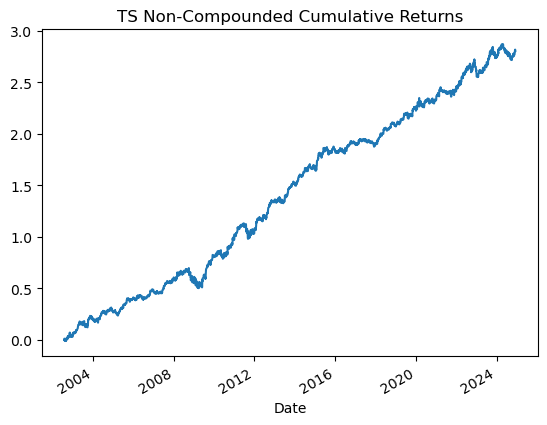

In [245]:
ts_returns = pd.concat([end_of_month_daily_close_returns, -start_of_month_daily_close_returns], axis=1).sum(axis=1)

ts_returns.cumsum().plot(title="TS Non-Compounded Cumulative Returns")
plt.show()

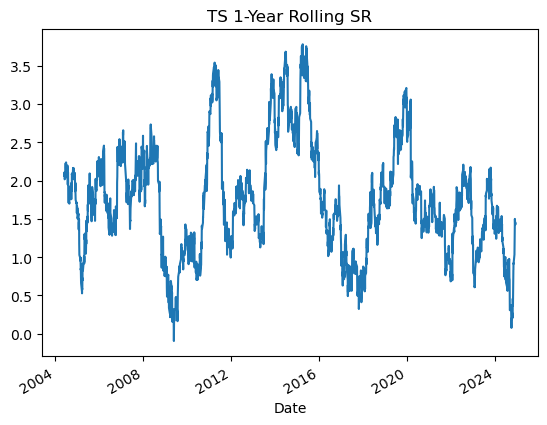

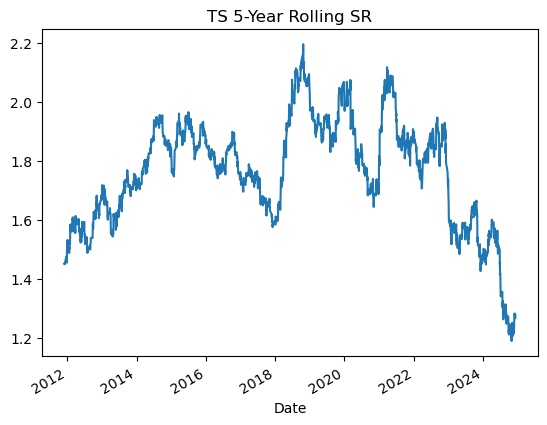

In [246]:
(ts_returns.rolling(252).mean() / ts_returns.rolling(252).std() * np.sqrt(252)).plot(title="TS 1-Year Rolling SR")
plt.show()

(ts_returns.rolling(5 * 252).mean() / ts_returns.rolling(5 * 252).std() * np.sqrt(252)).plot(title="TS 5-Year Rolling SR")
plt.show()

In [247]:
daily_sharpe = (ts_returns.mean() / ts_returns.std()) * np.sqrt(252)
daily_sharpe

1.6244549542778153

In [248]:
ts_returns.std() * np.sqrt(252)

0.14461393414623314

<Axes: xlabel='Date'>

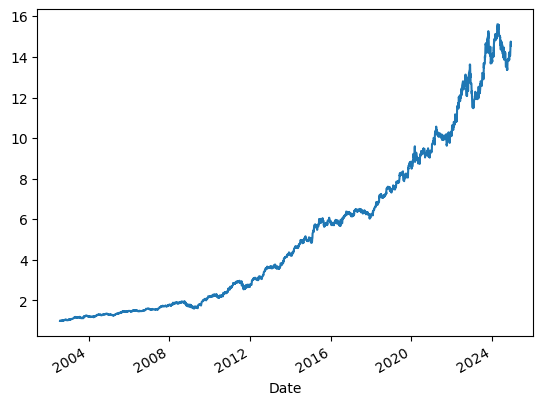

In [249]:
(1 + ts_returns).cumprod().plot()

In [250]:
spy = yf.download(tickers="SPY", period="max")
spy["close_returns"] = spy["Close"].pct_change()

returns = pd.concat([spy["close_returns"], data["close_returns"]], axis=1).dropna()
returns.columns = ["SPY", "TLT"]
returns

[*********************100%***********************]  1 of 1 completed


,SPY,TLT
Date,,
2002-07-31 00:00:00+00:00,0.002419,0.012390
2002-08-01 00:00:00+00:00,-0.026108,0.005695
2002-08-02 00:00:00+00:00,-0.022415,0.010241
2002-08-05 00:00:00+00:00,-0.034797,0.004413
2002-08-06 00:00:00+00:00,0.033664,-0.008549
...,...,...
2024-12-09 00:00:00+00:00,-0.005150,-0.009217
2024-12-10 00:00:00+00:00,-0.003109,-0.004705
2024-12-11 00:00:00+00:00,0.007731,-0.009454


In [251]:
returns["constant"] = 1

rolling_ols = RollingOLS(endog=returns["TLT"], exog=returns[["constant", "SPY"]], window=252, min_nobs=252, expanding=False).fit()
rolling_ols.params

,constant,SPY
Date,,
2002-07-31 00:00:00+00:00,NaN,NaN
2002-08-01 00:00:00+00:00,NaN,NaN
2002-08-02 00:00:00+00:00,NaN,NaN
2002-08-05 00:00:00+00:00,NaN,NaN
2002-08-06 00:00:00+00:00,NaN,NaN
...,...,...
2024-12-09 00:00:00+00:00,-0.000105,0.061977
2024-12-10 00:00:00+00:00,-0.000092,0.065031
2024-12-11 00:00:00+00:00,-0.000118,0.061063


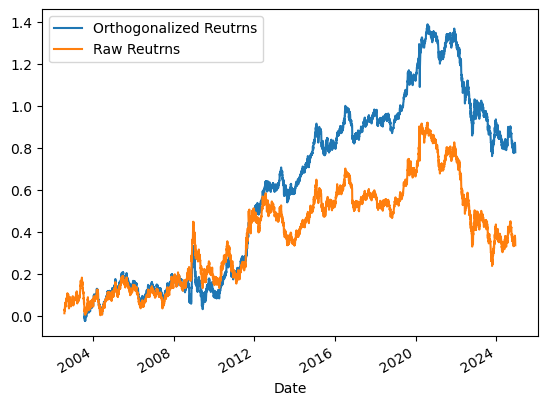

In [252]:
(returns["TLT"] - rolling_ols.params["SPY"] * returns["SPY"]).cumsum().plot(label="Orthogonalized Reutrns")
returns["TLT"].cumsum().plot(label="Raw Reutrns")
plt.legend()
plt.show()

1.7177047163275432

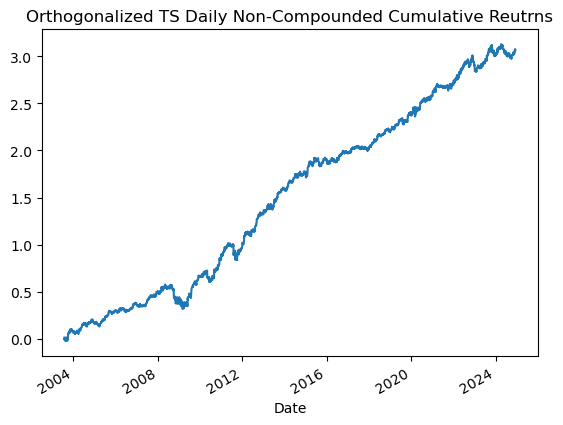

In [254]:
orthogonal_ts_returns = (ts_returns - rolling_ols.params["SPY"] * returns["SPY"]).dropna()

orthogonal_ts_returns.cumsum().plot(title="Orthogonalized TS Daily Non-Compounded Cumulative Reutrns")
orthogonal_ts_returns.mean() / orthogonal_ts_returns.std() * np.sqrt(252)

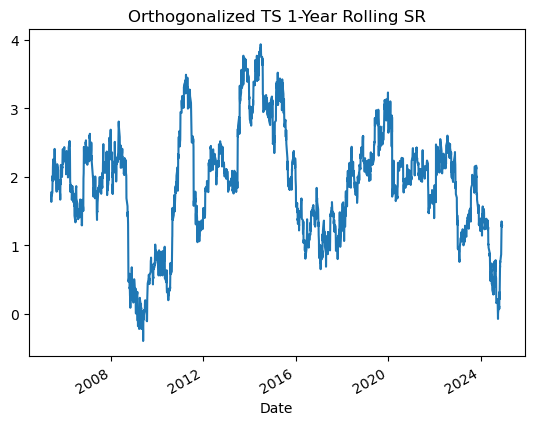

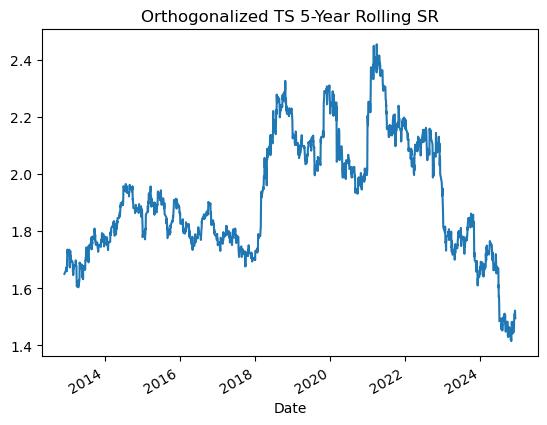

In [256]:
(orthogonal_ts_returns.rolling(252).mean() / orthogonal_ts_returns.rolling(252).std() * np.sqrt(252)).plot(title="Orthogonalized TS 1-Year Rolling SR")
plt.show()

(orthogonal_ts_returns.rolling(5 * 252).mean() / orthogonal_ts_returns.rolling(5 * 252).std() * np.sqrt(252)).plot(title="Orthogonalized TS 5-Year Rolling SR")
plt.show()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,IEF,IEF,IEF,IEF,IEF,IEF
Date,,,,,,
2002-07-30 00:00:00+00:00,42.947144,81.769997,82.120003,81.699997,81.940002,41300
2002-07-31 00:00:00+00:00,43.341045,82.519997,82.580002,82.050003,82.050003,32600
2002-08-01 00:00:00+00:00,43.519588,82.860001,82.900002,82.519997,82.540001,71400
2002-08-02 00:00:00+00:00,43.855755,83.500000,83.699997,82.900002,83.019997,120300
2002-08-05 00:00:00+00:00,44.076401,83.919998,83.919998,83.529999,83.680000,159300
...,...,...,...,...,...,...
2024-12-09 00:00:00+00:00,94.940002,94.940002,95.160004,94.940002,95.150002,4303100
2024-12-10 00:00:00+00:00,94.769997,94.769997,94.839996,94.650002,94.739998,3543400


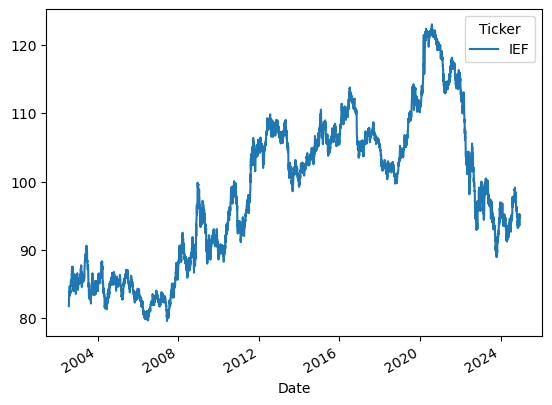

In [278]:
ief: pd.DataFrame = yf.download(tickers="IEF", period="max")
ief.Close.plot()
ief

In [279]:
ief["day_of_month"] = [date.day for date in ief.index]
ief["day_of_month"]

Date
2002-07-30 00:00:00+00:00    30
2002-07-31 00:00:00+00:00    31
2002-08-01 00:00:00+00:00     1
2002-08-02 00:00:00+00:00     2
2002-08-05 00:00:00+00:00     5
                             ..
2024-12-09 00:00:00+00:00     9
2024-12-10 00:00:00+00:00    10
2024-12-11 00:00:00+00:00    11
2024-12-12 00:00:00+00:00    12
2024-12-13 00:00:00+00:00    13
Name: day_of_month, Length: 5634, dtype: int64

In [280]:
ief["week_of_month"] = [get_week_of_month(date=date) for date in ief.index]
ief["week_of_month"]

Date
2002-07-30 00:00:00+00:00    5
2002-07-31 00:00:00+00:00    5
2002-08-01 00:00:00+00:00    1
2002-08-02 00:00:00+00:00    1
2002-08-05 00:00:00+00:00    1
                            ..
2024-12-09 00:00:00+00:00    2
2024-12-10 00:00:00+00:00    2
2024-12-11 00:00:00+00:00    2
2024-12-12 00:00:00+00:00    2
2024-12-13 00:00:00+00:00    2
Name: week_of_month, Length: 5634, dtype: int64

In [281]:
ief["close_returns"] = ief["Close"].pct_change()
ief["standardized_close_returns"] = time_series_z_score(data=ief, statistic="close_returns", halflife=252)
ief["standardized_close_returns"]

Date
2002-07-30 00:00:00+00:00         NaN
2002-07-31 00:00:00+00:00         NaN
2002-08-01 00:00:00+00:00         NaN
2002-08-02 00:00:00+00:00         NaN
2002-08-05 00:00:00+00:00         NaN
                               ...   
2024-12-09 00:00:00+00:00   -0.682102
2024-12-10 00:00:00+00:00   -0.344174
2024-12-11 00:00:00+00:00   -0.578095
2024-12-12 00:00:00+00:00   -0.749353
2024-12-13 00:00:00+00:00   -0.921790
Name: standardized_close_returns, Length: 5634, dtype: float64

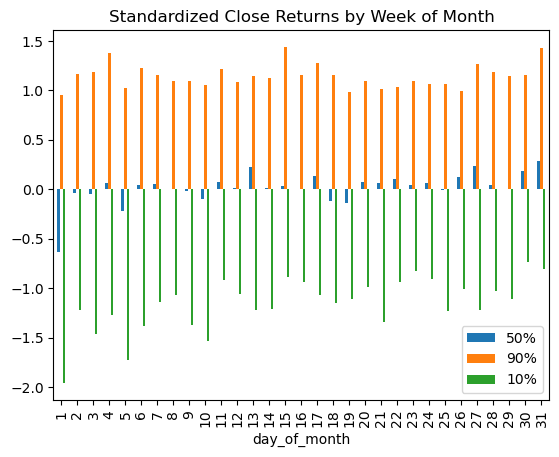

In [ ]:
plot_by_time_of_month(data=ief, statistic="standardized_close_returns", title="Standardized Close Returns by Week of Month", kind="line")

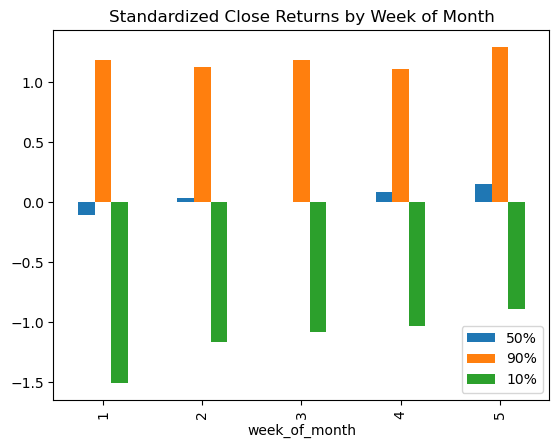

In [283]:
plot_by_time_of_month(data=ief, statistic="standardized_close_returns", title="Standardized Close Returns by Week of Month", groupby="week_of_month", kind="bar")

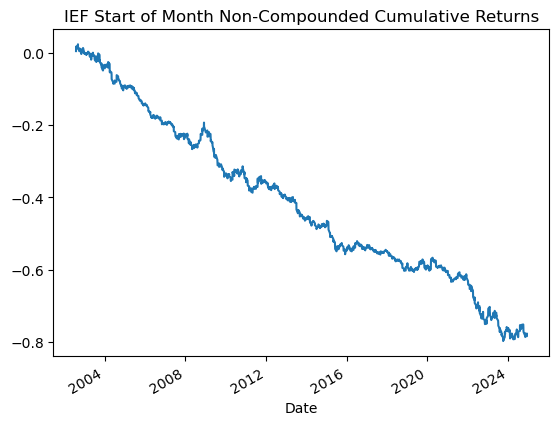

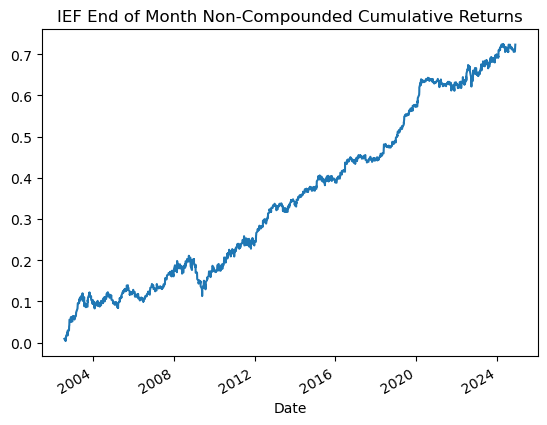

In [291]:
ief_start_of_month_daily_returns = ief[ief["week_of_month"] == 1]["close_returns"]
ief_start_of_month_daily_returns.cumsum().plot(title="IEF Start of Month Non-Compounded Cumulative Returns")
plt.show()

ief_end_of_month_daily_returns = ief[ief["week_of_month"] >= 4]["close_returns"]
ief_end_of_month_daily_returns.cumsum().plot(title="IEF End of Month Non-Compounded Cumulative Returns")
plt.show()

<Axes: title={'center': 'IEF TS Non-Compounded Cumulative Returns'}, xlabel='Date'>

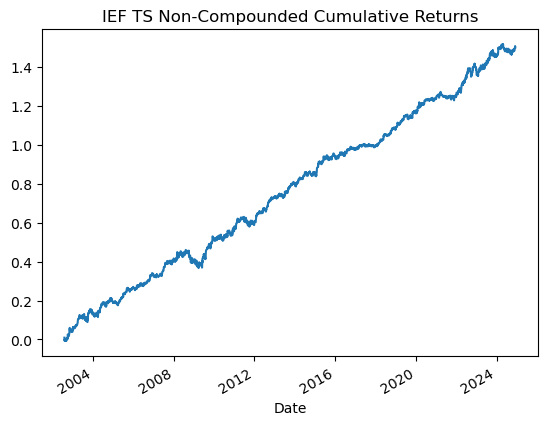

In [292]:
ief_ts_returns = pd.concat([ief_end_of_month_daily_returns, - ief_start_of_month_daily_returns], axis=1).mean(axis=1)
ief_ts_returns.cumsum().plot(title="IEF TS Non-Compounded Cumulative Returns")

In [293]:
ief_ts_returns.mean() / ief_ts_returns.std() * np.sqrt(252)

1.809083710080929

In [300]:
X = pd.concat([ief["close_returns"], spy["close_returns"]], axis=1).dropna()
X.columns = ["IEF", "SPY"]
X["constant"] = 1
X

,IEF,SPY,constant
Date,,,
2002-07-31 00:00:00+00:00,0.009172,0.002419,1
2002-08-01 00:00:00+00:00,0.004120,-0.026108,1
2002-08-02 00:00:00+00:00,0.007724,-0.022415,1
2002-08-05 00:00:00+00:00,0.005030,-0.034797,1
2002-08-06 00:00:00+00:00,-0.008103,0.033664,1
...,...,...,...
2024-12-09 00:00:00+00:00,-0.003464,-0.005150,1
2024-12-10 00:00:00+00:00,-0.001791,-0.003109,1
2024-12-11 00:00:00+00:00,-0.002955,0.007731,1


In [303]:
ief_regression = RollingOLS(endog=X["IEF"], exog=X[["constant", "SPY"]], window=252, min_nobs=252, expanding=False).fit()
ief_regression.params.dropna()

,constant,SPY
Date,,
2003-07-30 00:00:00+00:00,0.000201,-0.185696
2003-07-31 00:00:00+00:00,0.000138,-0.186225
2003-08-01 00:00:00+00:00,0.000116,-0.185592
2003-08-04 00:00:00+00:00,0.000130,-0.184263
2003-08-05 00:00:00+00:00,0.000091,-0.181004
...,...,...
2024-12-09 00:00:00+00:00,-0.000019,0.038946
2024-12-10 00:00:00+00:00,-0.000001,0.040840
2024-12-11 00:00:00+00:00,-0.000012,0.039394


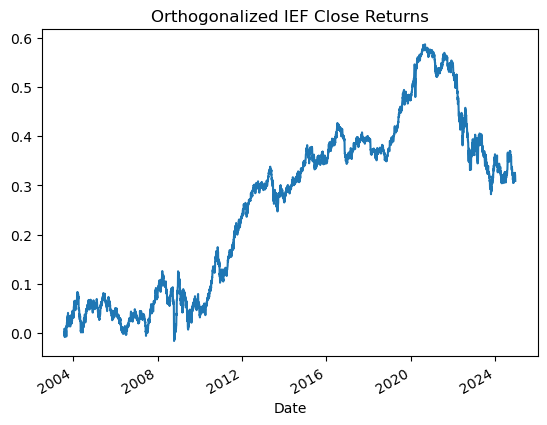

In [306]:
(ief["close_returns"] - ief_regression.params["SPY"] * spy["close_returns"]).dropna().cumsum().plot(title="Orthogonalized IEF Close Returns")
plt.show()

<Axes: title={'center': 'Orthogonalized IEF TS Close Returns'}, xlabel='Date'>

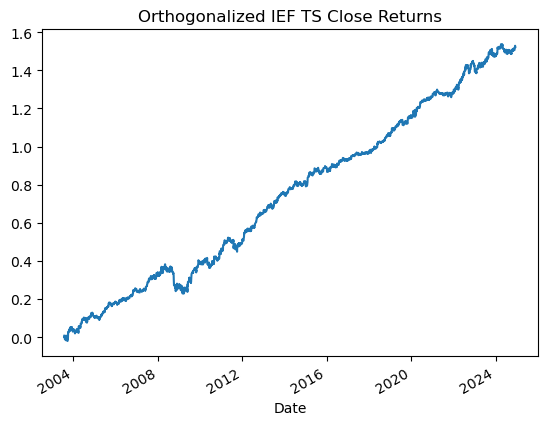

In [310]:
orthogonalized_ief_ts_returns = (ief_ts_returns - ief_regression.params["SPY"] * spy["close_returns"]).dropna()
orthogonalized_ief_ts_returns.cumsum().plot(title="Orthogonalized IEF TS Close Returns")

In [311]:
orthogonalized_ief_ts_returns.mean() / orthogonalized_ief_ts_returns.std() * np.sqrt(252)

1.789986122943938

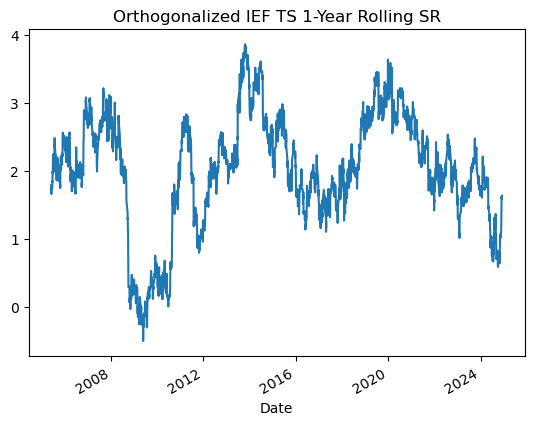

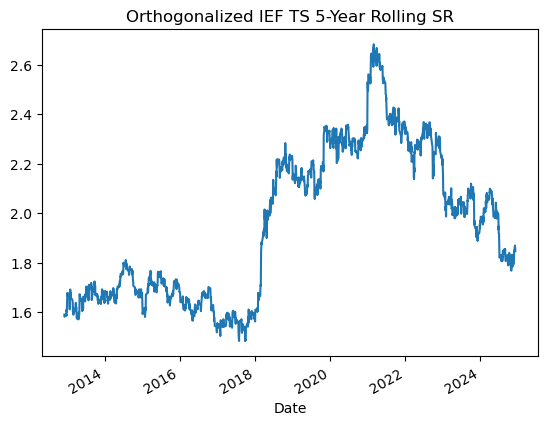

In [312]:
(orthogonalized_ief_ts_returns.rolling(252).mean() / orthogonalized_ief_ts_returns.rolling(252).std() * np.sqrt(252)).plot(title="Orthogonalized IEF TS 1-Year Rolling SR")
plt.show()

(orthogonalized_ief_ts_returns.rolling(5 * 252).mean() / orthogonalized_ief_ts_returns.rolling(5 * 252).std() * np.sqrt(252)).plot(title="Orthogonalized IEF TS 5-Year Rolling SR")
plt.show()